In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

<img src="equacao.png">

In [29]:
K = 1 # m²/s
deltat = 0.05 # s
deltax = 0.5 # m  
deltay = 0.5 # m
Lx = 30
Ly = 20
Tdes = 3
Ttotal = 10*Tdes
num_grup = 9
a = num_grup/1.4
b = 60/(num_grup + 5)
Q = 100
alpha = 1
u = alpha
a,b

(6.428571428571429, 4.285714285714286)

In [30]:
x = np.linspace(0, Lx, int(Lx/deltax)+1)
y = np.linspace(0, Ly, int(Ly/deltay)+1)
t = np.linspace(0, Ttotal, int(Ttotal/deltat)+1)
print(len(x), len(y))

61 41


In [31]:
listatempo = []
for _ in range(len(t)):
    matrix = np.zeros((len(y),len(x)))
    listatempo.append(matrix)

In [32]:
xdesp = int(b/deltax)
ydesp = int(a/deltay)
vx = int(Lx/deltax)
vy = int(Ly/deltay)
Tdesp = int(Tdes/deltat)
vx,vy,xdesp,ydesp,Tdesp

(60, 40, 8, 12, 60)

In [33]:
%%time
copia = listatempo.copy()
for m,matrix in enumerate(copia):
    for i,linha in enumerate(matrix):
        for j,elem in enumerate(linha):
            v = alpha*math.sin(math.pi*deltax*j/5)
            if(m != len(t)-1):
                
                if(i != 0 and i < vy and j < vx and j != 0):
                    
                    if(i == xdesp and j == ydesp and m <= Tdesp):
                        t5 = Q/(deltax*deltay)
                    else:
                        t5 = 0
                    
                    t1 = u*(copia[m][i][j+1] - copia[m][i][j-1])/(2*deltax)
                    t2 = v*(copia[m][i+1][j] - copia[m][i-1][j])/(2*deltay)
                    
                    t3 = K*(copia[m][i][j+1] - 2*copia[m][i][j] + copia[m][i][j-1])/(deltax**2)
                    t4 = K*(copia[m][i+1][j] - 2*copia[m][i][j] + copia[m][i-1][j])/(deltay**2)
                    
                    copia[m+1][i][j] = copia[m][i][j] - deltat*(t1 + t2 - t3 - t4 - t5)
                    
                else:
                    if(j == 0):
                        copia[m+1][i][0] = copia[m+1][i][1]
                    elif(i == 0):
                        copia[m+1][0][j] = copia[m+1][1][j]
                    elif(j == vx):
                        copia[m+1][i][vx] = copia[m+1][i][vx - 1]
                    elif(i == vy):
                        copia[m+1][vy][j] = copia[m+1][vy - 1][j]
print("acabou")

# for matrix in copia[:20]:
#     print(matrix)


acabou
Wall time: 34.7 s


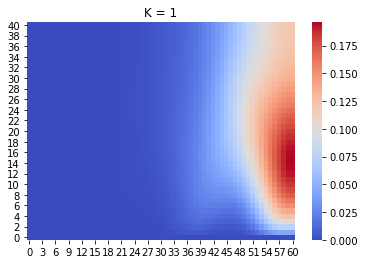

In [34]:
heatmap = sns.heatmap(copia[-1], annot = False, linewidths=0,cmap='coolwarm')
plt.title("K = {}".format(K))
plt.gca().invert_yaxis()

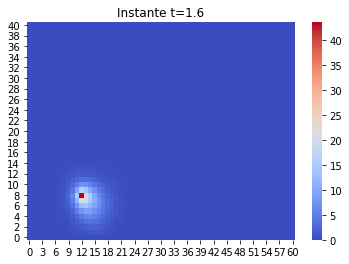

In [40]:
heatmap = sns.heatmap(copia[32], annot = False, linewidths=0,cmap='coolwarm')
plt.title("Instante t=1.6")
plt.gca().invert_yaxis()

In [36]:
print(copia[int(5/deltat)+1][40][40])

5.356978827923542e-09


In [37]:
for m,matrix in enumerate(copia):
    left=matrix[:,0]
    right=matrix[:,-1]
    up=matrix[0,:]
    down=matrix[-1,:]
    if(m==32):
        print(down)
#     print(max(down),len(down))
    if (max(left)>0):
        print("left")
        print(m)
        break 
    elif (max(right)>0):
        print("right")
        print(m)
        break 
    elif (max(up)>0):
        print("up")
        print(m)
        break 
    elif (max(down)>0):
        print("down")
        print(m)
        break 
print("oi")

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.11334433e-23 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
down
32
oi


In [39]:
32*deltat

1.6